In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.1)

def comprehensive_token_analysis(df, token_column='token_length', document_column='document_name', figsize=(20, 15)):
    """
    Create comprehensive token length analysis using matplotlib and seaborn
    
    Parameters:
    df: pandas DataFrame with token length data
    token_column: name of the column containing token lengths
    document_column: name of the column containing document identifiers
    """
    
    # Calculate statistics
    token_data = df[token_column]
    stats_summary = {
        'mean': token_data.mean(),
        'median': token_data.median(),
        'std': token_data.std(),
        'min': token_data.min(),
        'max': token_data.max(),
        'q25': token_data.quantile(0.25),
        'q75': token_data.quantile(0.75),
        'count': len(token_data),
        'skewness': stats.skew(token_data),
        'kurtosis': stats.kurtosis(token_data)
    }
    
    # Create comprehensive figure with subplots
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)
    
    # 1. Bar Chart - Individual Documents (Top 20)
    ax1 = fig.add_subplot(gs[0, :2])
    top_20 = df.head(20)
    bars = ax1.bar(range(len(top_20)), top_20[token_column], 
                   color=plt.cm.viridis(np.linspace(0, 1, len(top_20))))
    ax1.set_title('Token Length by Document (First 20)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Document Index')
    ax1.set_ylabel('Token Length')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)
    
    # 2. Histogram with KDE
    ax2 = fig.add_subplot(gs[0, 2:])
    ax2.hist(token_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
    
    # Add KDE curve
    x_range = np.linspace(token_data.min(), token_data.max(), 100)
    kde = stats.gaussian_kde(token_data)
    ax2.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
    
    # Add mean and median lines
    ax2.axvline(stats_summary['mean'], color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {stats_summary["mean"]:.0f}')
    ax2.axvline(stats_summary['median'], color='green', linestyle='--', linewidth=2, 
                label=f'Median: {stats_summary["median"]:.0f}')
    
    ax2.set_title('Token Length Distribution with KDE', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Token Length')
    ax2.set_ylabel('Density')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Box Plot with Swarm Plot
    ax3 = fig.add_subplot(gs[1, :2])
    
    # Create category for better visualization
    df_copy = df.copy()
    df_copy['category'] = 'All Documents'
    
    # Box plot
    box_plot = ax3.boxplot(token_data, patch_artist=True, 
                          boxprops=dict(facecolor='lightblue', alpha=0.7),
                          medianprops=dict(color='red', linewidth=2))
    
    # Add swarm plot for individual points (sample if too many)
    if len(df_copy) > 200:
        sample_df = df_copy.sample(200)
        y_data = sample_df[token_column]
        x_data = np.random.normal(1, 0.04, len(sample_df))  # Add some jitter
        ax3.scatter(x_data, y_data, alpha=0.6, s=20, color='darkblue')
        ax3.text(0.5, ax3.get_ylim()[1]*0.95, f'Showing 200 random samples', 
                ha='center', fontsize=10, style='italic')
    else:
        x_data = np.random.normal(1, 0.04, len(df_copy))
        ax3.scatter(x_data, df_copy[token_column], alpha=0.6, s=20, color='darkblue')
    
    ax3.set_title('Token Length Box Plot with Data Points', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Token Length')
    ax3.set_xticklabels(['All Documents'])
    ax3.grid(True, alpha=0.3)
    
    # 4. Scatter Plot - Document Order vs Token Length
    ax4 = fig.add_subplot(gs[1, 2:])
    colors = plt.cm.plasma(np.linspace(0, 1, len(df)))
    scatter = ax4.scatter(range(len(df)), token_data, c=colors, alpha=0.6, s=30)
    
    # Add trend line
    z = np.polyfit(range(len(df)), token_data, 1)
    p = np.poly1d(z)
    ax4.plot(range(len(df)), p(range(len(df))), "r--", alpha=0.8, linewidth=2, 
             label=f'Trend: y={z[0]:.2f}x+{z[1]:.0f}')
    
    ax4.set_title('Token Length vs Document Order', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Document Index')
    ax4.set_ylabel('Token Length')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Violin Plot
    ax5 = fig.add_subplot(gs[2, :2])
    violin_parts = ax5.violinplot([token_data], positions=[1], widths=0.6, 
                                 showmeans=True, showmedians=True)
    
    # Customize violin plot colors
    for pc in violin_parts['bodies']:
        pc.set_facecolor('lightcoral')
        pc.set_alpha(0.7)
    
    ax5.set_title('Token Length Violin Plot', fontsize=14, fontweight='bold')
    ax5.set_ylabel('Token Length')
    ax5.set_xticks([1])
    ax5.set_xticklabels(['All Documents'])
    ax5.grid(True, alpha=0.3)
    
    # 6. Cumulative Distribution
    ax6 = fig.add_subplot(gs[2, 2:])
    sorted_data = np.sort(token_data)
    cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    ax6.plot(sorted_data, cumulative_prob, linewidth=2, color='purple')
    ax6.fill_between(sorted_data, cumulative_prob, alpha=0.3, color='purple')
    
    # Add percentile lines
    for percentile in [25, 50, 75, 90]:
        value = np.percentile(token_data, percentile)
        ax6.axvline(value, color='red', linestyle=':', alpha=0.7, 
                   label=f'{percentile}th: {value:.0f}' if percentile in [25, 75] else None)
    
    ax6.set_title('Cumulative Distribution Function', fontsize=14, fontweight='bold')
    ax6.set_xlabel('Token Length')
    ax6.set_ylabel('Cumulative Probability')
    ax6.grid(True, alpha=0.3)
    ax6.legend()
    
    # 7. Category Distribution (Pie Chart)
    ax7 = fig.add_subplot(gs[3, :2])
    
    def categorize_length(length):
        if length <= 200:
            return 'Short (≤200)'
        elif length <= 500:
            return 'Medium (201-500)'
        elif length <= 1000:
            return 'Long (501-1000)'
        else:
            return 'Very Long (>1000)'
    
    categories = df[token_column].apply(categorize_length)
    category_counts = categories.value_counts()
    
    colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    wedges, texts, autotexts = ax7.pie(category_counts.values, labels=category_counts.index, 
                                      autopct='%1.1f%%', startangle=90, colors=colors_pie,
                                      explode=(0.05, 0.05, 0.05, 0.05))
    
    # Beautify pie chart text
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)
    
    ax7.set_title('Token Length Categories Distribution', fontsize=14, fontweight='bold')
    
    # 8. Statistics Summary Table
    ax8 = fig.add_subplot(gs[3, 2:])
    ax8.axis('off')
    
    # Create statistics table
    stats_text = f"""
    STATISTICAL SUMMARY
    ━━━━━━━━━━━━━━━━━━━━━━━━
    Count:           {stats_summary['count']:,}
    Mean:            {stats_summary['mean']:.2f}
    Median:          {stats_summary['median']:.2f}
    Std Deviation:   {stats_summary['std']:.2f}
    ━━━━━━━━━━━━━━━━━━━━━━━━
    Minimum:         {stats_summary['min']:,}
    25th Percentile: {stats_summary['q25']:.2f}
    75th Percentile: {stats_summary['q75']:.2f}
    Maximum:         {stats_summary['max']:,}
    ━━━━━━━━━━━━━━━━━━━━━━━━
    Skewness:        {stats_summary['skewness']:.3f}
    Kurtosis:        {stats_summary['kurtosis']:.3f}
    Range:           {stats_summary['max'] - stats_summary['min']:,}
    IQR:             {stats_summary['q75'] - stats_summary['q25']:.2f}
    """
    
    ax8.text(0.1, 0.9, stats_text, transform=ax8.transAxes, fontsize=12, 
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    plt.suptitle('Comprehensive Token Length Analysis Dashboard', 
                fontsize=18, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.show()
    
    return stats_summary

def simple_token_plots(df, token_column='token_length', document_column='document_name'):
    """
    Create simple, clean plots for token length analysis
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Token Length Analysis', fontsize=16, fontweight='bold')
    
    token_data = df[token_column]
    
    # 1. Bar Chart (first 20 documents)
    top_20 = df.head(20)
    axes[0,0].bar(range(len(top_20)), top_20[token_column], 
                  color='steelblue', alpha=0.8, edgecolor='black')
    axes[0,0].set_title('Token Length by Document (First 20)', fontweight='bold')
    axes[0,0].set_xlabel('Document Index')
    axes[0,0].set_ylabel('Token Length')
    axes[0,0].tick_params(axis='x', rotation=45)
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Histogram
    axes[0,1].hist(token_data, bins=25, color='lightgreen', alpha=0.8, edgecolor='black')
    axes[0,1].axvline(token_data.mean(), color='red', linestyle='--', linewidth=2, 
                     label=f'Mean: {token_data.mean():.0f}')
    axes[0,1].axvline(token_data.median(), color='blue', linestyle='--', linewidth=2, 
                     label=f'Median: {token_data.median():.0f}')
    axes[0,1].set_title('Token Length Distribution', fontweight='bold')
    axes[0,1].set_xlabel('Token Length')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Box Plot
    box_plot = axes[1,0].boxplot(token_data, patch_artist=True, 
                                boxprops=dict(facecolor='lightcoral', alpha=0.8),
                                medianprops=dict(color='darkred', linewidth=2))
    axes[1,0].set_title('Token Length Box Plot', fontweight='bold')
    axes[1,0].set_ylabel('Token Length')
    axes[1,0].set_xticklabels(['All Documents'])
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Scatter Plot
    axes[1,1].scatter(range(len(df)), token_data, alpha=0.6, color='purple', s=20)
    
    # Add trend line
    z = np.polyfit(range(len(df)), token_data, 1)
    p = np.poly1d(z)
    axes[1,1].plot(range(len(df)), p(range(len(df))), "r--", alpha=0.8, linewidth=2)
    
    axes[1,1].set_title('Token Length vs Document Order', fontweight='bold')
    axes[1,1].set_xlabel('Document Index')
    axes[1,1].set_ylabel('Token Length')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def seaborn_advanced_plots(df, token_column='token_length', document_column='document_name'):
    """
    Advanced plotting using seaborn's specialized functions
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Advanced Token Length Analysis with Seaborn', fontsize=16, fontweight='bold')
    
    token_data = df[token_column]
    
    # 1. Distribution plot with multiple elements
    sns.histplot(data=df, x=token_column, kde=True, stat='density', ax=axes[0,0])
    axes[0,0].axvline(token_data.mean(), color='red', linestyle='--', 
                     label=f'Mean: {token_data.mean():.0f}')
    axes[0,0].set_title('Distribution with KDE')
    axes[0,0].legend()
    
    # 2. Box plot with swarm plot overlay
    sns.boxplot(y=token_data, ax=axes[0,1], color='lightblue')
    
    # Add swarm plot if data size is manageable
    if len(df) <= 200:
        # Create a DataFrame for seaborn
        plot_df = pd.DataFrame({token_column: token_data, 'category': 'All'})
        sns.swarmplot(data=plot_df, y=token_column, x='category', ax=axes[0,1], 
                     size=3, alpha=0.6, color='darkblue')
    
    axes[0,1].set_title('Box Plot with Data Points')
    axes[0,1].set_xlabel('')
    
    # 3. Violin plot
    plot_df = pd.DataFrame({token_column: token_data, 'category': 'All Documents'})
    sns.violinplot(data=plot_df, y=token_column, x='category', ax=axes[0,2])
    axes[0,2].set_title('Violin Plot')
    axes[0,2].set_xlabel('')
    
    # 4. Regression plot (if there's a trend over document order)
    df_with_index = df.copy()
    df_with_index['doc_index'] = range(len(df))
    sns.regplot(data=df_with_index, x='doc_index', y=token_column, ax=axes[1,0], 
                scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    axes[1,0].set_title('Token Length vs Document Order')
    axes[1,0].set_xlabel('Document Index')
    
    # 5. Strip plot with jitter
    sns.stripplot(data=plot_df, y=token_column, x='category', ax=axes[1,1], 
                 size=4, alpha=0.7, jitter=True)
    axes[1,1].set_title('Strip Plot with Jitter')
    axes[1,1].set_xlabel('')
    
    # 6. ECDF (Empirical Cumulative Distribution Function)
    sns.ecdfplot(data=df, x=token_column, ax=axes[1,2])
    axes[1,2].set_title('Empirical CDF')
    axes[1,2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Streamlit integration function
def streamlit_matplotlib_plots(df, token_column='token_length', document_column='document_name'):
    """
    For use in Streamlit apps
    """
    import streamlit as st
    
    st.title("Token Length Analysis Dashboard")
    
    # Display basic statistics
    token_data = df[token_column]
    col1, col2, col3, col4 = st.columns(4)
    
    with col1:
        st.metric("Mean", f"{token_data.mean():.0f}")
    with col2:
        st.metric("Median", f"{token_data.median():.0f}")
    with col3:
        st.metric("Min", f"{token_data.min()}")
    with col4:
        st.metric("Max", f"{token_data.max()}")
    
    # Plot selection
    plot_type = st.selectbox("Select Plot Type:", 
                            ["Simple Overview", "Comprehensive Analysis", "Seaborn Advanced"])
    
    if plot_type == "Simple Overview":
        simple_token_plots(df, token_column, document_column)
        st.pyplot(plt.gcf())
        
    elif plot_type == "Comprehensive Analysis":
        stats = comprehensive_token_analysis(df, token_column, document_column)
        st.pyplot(plt.gcf())
        
    elif plot_type == "Seaborn Advanced":
        seaborn_advanced_plots(df, token_column, document_column)
        st.pyplot(plt.gcf())

# # Example usage and sample data creation
# if __name__ == "__main__":
#     # Create sample data for demonstration
#     np.random.seed(42)
    
#     # Generate realistic token length data
#     n_docs = 100
#     sample_data = pd.DataFrame({
#         'document_name': [f'Document_{i:03d}' for i in range(1, n_docs + 1)],
#         'token_length': np.random.lognormal(mean=5.8, sigma=0.6, size=n_docs).astype(int),
#         'document_type': np.random.choice(['Article', 'Report', 'Paper'], n_docs)
#     })
    
#     # Ensure no negative values
#     sample_data['token_length'] = np.maximum(sample_data['token_length'], 50)
    
#     print("Sample data created!")
#     print(f"Data shape: {sample_data.shape}")
#     print(f"Token length range: {sample_data['token_length'].min()} - {sample_data['token_length'].max()}")
#     print("\n" + "="*50)
    
#     # Run the comprehensive analysis
#     print("Generating comprehensive analysis...")
#     stats = comprehensive_token_analysis(sample_data, 'token_length', 'document_name')
    
#     print("\n" + "="*50)
#     print("Generating simple plots...")
#     simple_token_plots(sample_data, 'token_length', 'document_name')
    
#     print("\n" + "="*50)
#     print("Generating seaborn advanced plots...")
#     seaborn_advanced_plots(sample_data, 'token_length', 'document_name')

In [3]:
ls = ['output\General_train_text_chunk_1_cleaned.jsonl', 'output\General_train_text_chunk_2_cleaned.jsonl', 'output\General_train_text_chunk_3_cleaned.jsonl', 'output\General_train_text_chunk_4_cleaned.jsonl', 'output\General_train_text_chunk_5_cleaned.jsonl', 'output\General_train_text_chunk_6_cleaned.jsonl']

for i in ls:
    df = pd.read_json(i, lines = True)
    df['cleaned_abstract'] = df['cleaned_abstract'].apply(lambda x: 'sostok ' + x + ' eostok')
    df.to_json(i, orient = 'records', lines = True)

In [11]:
import sentencepiece as spm
spm.SentencePieceTrainer.Train(input = ['output\General_train_text_chunk_1_cleaned.jsonl', 'output\General_train_text_chunk_2_cleaned.jsonl', 'output\General_train_text_chunk_3_cleaned.jsonl', 'output\General_train_text_chunk_4_cleaned.jsonl', 'output\General_train_text_chunk_5_cleaned.jsonl', 'output\General_train_text_chunk_6_cleaned.jsonl'], model_prefix = 'bpe', vocab_size = 2000)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sentencepiece as spm
# Load your data
df = pd.read_json('output\General_train_text_chunk_1_cleaned.jsonl', lines = True)

sp = spm.SentencePieceProcessor(model_file = 'bpe.model')
for i in range(len(df)):
    text = sp.encode(df.at[i, 'cleaned_text'])
    abstract = sp.encode(df.at[i, 'cleaned_abstract'])
    df.at[i, 'text_token_length'] = int(len(text))
    df.at[i, 'abstract_token_lenght'] = int(len(abstract))

df

,cleaned_text,cleaned_abstract,text_token_length,abstract_token_lenght
0,"London, england (reuters) -- harry potter star...",sostok Harry potter star daniel radcliffe gets...,789.0,84.0
1,Editor's note: in our behind the scenes series...,sostok Mentally ill inmates in miami are house...,1292.0,104.0
2,"Minneapolis, minnesota (cnn) -- Drivers who we...","sostok New: ""i thought i was going to die,"" dr...",1237.0,77.0
3,Washington (cnn) -- Doctors removed five small...,sostok Five small polyps found during procedur...,834.0,73.0
4,(cnn) -- The national football league has inde...,"sostok New: nfl chief, atlanta falcons owner c...",1826.0,103.0
...,...,...,...,...
29995,(cnn) -- Southwest airlines is working with fe...,sostok Employees received an internal memo abo...,420.0,68.0
29996,(cnn) -- A former massachusetts state chemist ...,"sostok Former chemist, 34, faces new charges a...",1427.0,101.0
29997,(cnn) -- wednesday is the 100th anniversary of...,sostok Timothy stanley: wednesday is 100th ann...,2042.0,113.0
29998,Washington (cnn) -- black ice -- road ice virt...,"sostok ""black ice was involved"" in oregon cras...",852.0,78.0


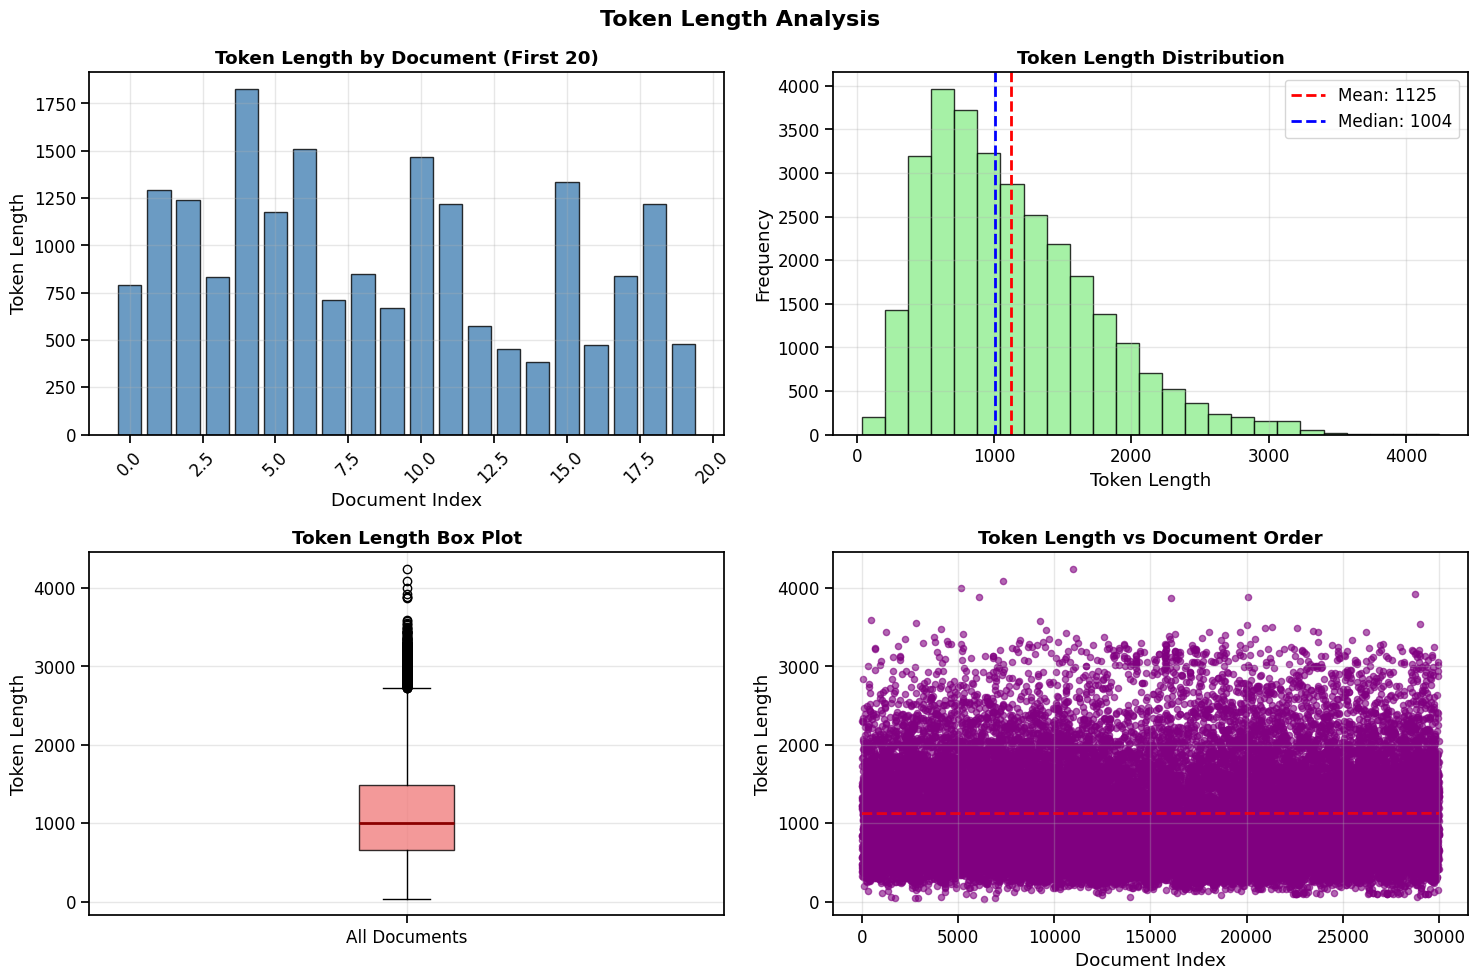

In [13]:
# Create simple plots
simple_token_plots(df, token_column='text_token_length', document_column=df)

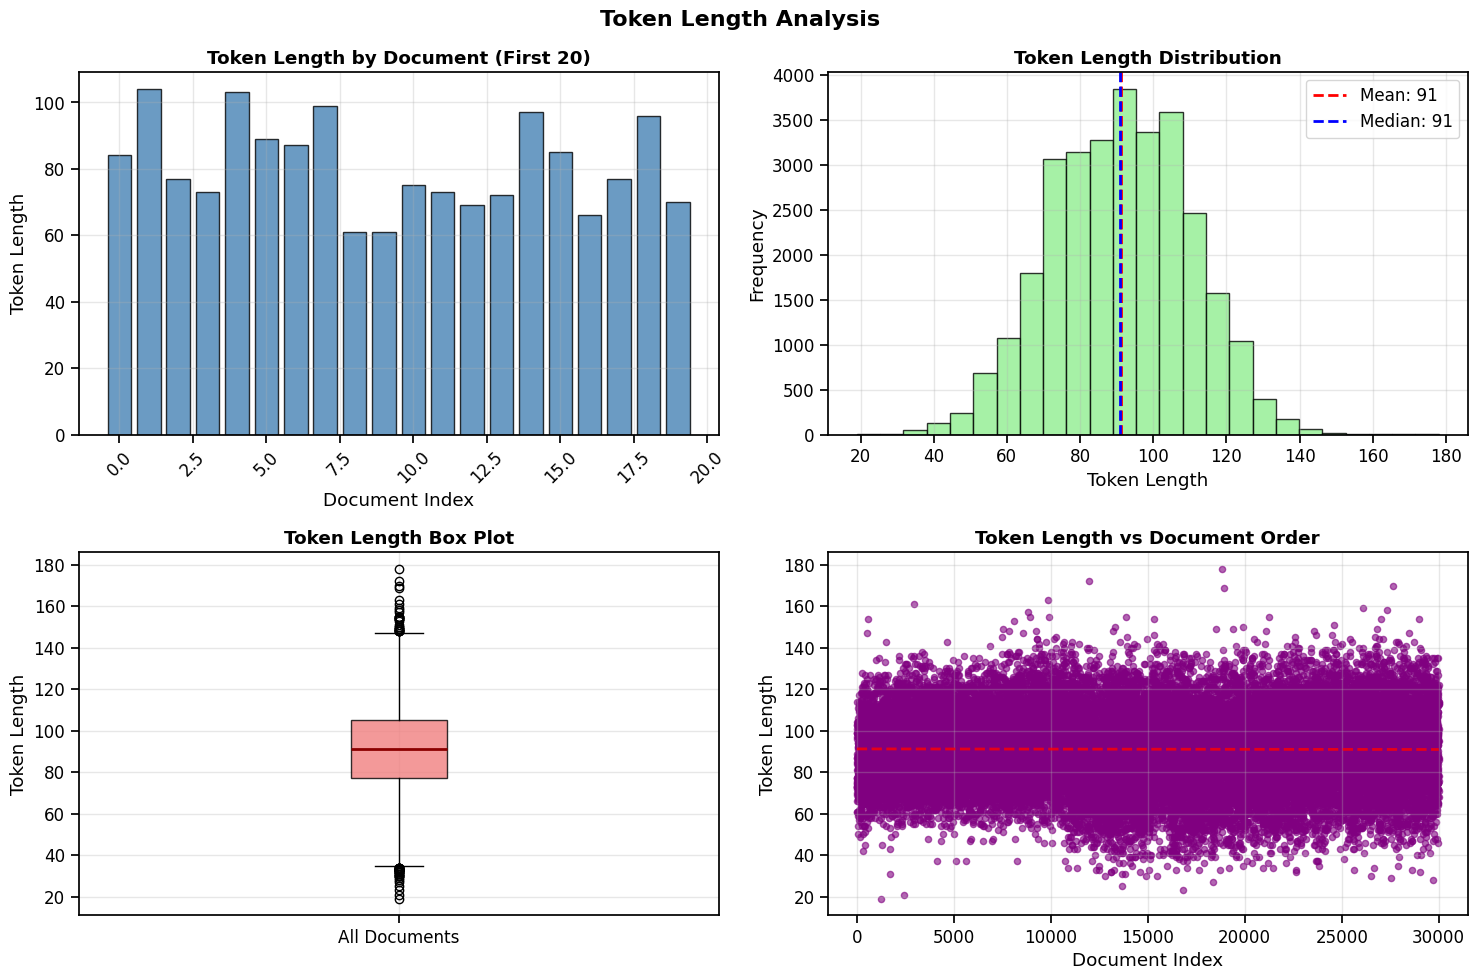

In [14]:
# Create simple plots
simple_token_plots(df, token_column='abstract_token_lenght', document_column=df)